In [72]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("ggplot")
sns.set_theme()

In [56]:
#load dataset
df = pd.read_csv('Binance_WBTCETH_d.csv', skiprows=1)
df

,Unix,Date,Symbol,Open,High,Low,Close,Volume WBTC,Volume ETH,tradecount
0,1759536000000,2025-10-04,WBTCETH,27.1600,27.3900,27.1600,27.2200,0.40975,11.164314,169
1,1759449600000,2025-10-03,WBTCETH,26.8600,27.2700,26.4500,27.0500,1.59839,43.162561,502
2,1759363200000,2025-10-02,WBTCETH,27.2400,27.3200,26.7300,26.8900,0.59010,15.916575,386
3,1759276800000,2025-10-01,WBTCETH,27.6000,27.7300,26.9200,27.2800,0.90510,24.810029,223
4,1759190400000,2025-09-30,WBTCETH,27.1300,27.6500,27.0500,27.6200,0.80532,22.023941,293
...,...,...,...,...,...,...,...,...,...,...
1856,1599177600000,2020-09-04,WBTCETH,26.6279,27.6672,26.3214,27.1388,11.43740,305.619449,544
1857,1599091200000,2020-09-03,WBTCETH,26.0149,27.4065,25.4458,26.6862,21.85060,578.793301,1069
1858,1599004800000,2020-09-02,WBTCETH,24.8566,26.8284,24.8243,25.9359,28.12000,719.895339,814
1859,1598918400000,2020-09-01,WBTCETH,26.9386,27.4292,24.6384,25.0915,13.44950,348.936288,650


In [57]:
#standardize our cols to lowercase and a snake type format
df.columns = df.columns.str.lower().str.replace(' ', '_') 
df

,unix,date,symbol,open,high,low,close,volume_wbtc,volume_eth,tradecount
0,1759536000000,2025-10-04,WBTCETH,27.1600,27.3900,27.1600,27.2200,0.40975,11.164314,169
1,1759449600000,2025-10-03,WBTCETH,26.8600,27.2700,26.4500,27.0500,1.59839,43.162561,502
2,1759363200000,2025-10-02,WBTCETH,27.2400,27.3200,26.7300,26.8900,0.59010,15.916575,386
3,1759276800000,2025-10-01,WBTCETH,27.6000,27.7300,26.9200,27.2800,0.90510,24.810029,223
4,1759190400000,2025-09-30,WBTCETH,27.1300,27.6500,27.0500,27.6200,0.80532,22.023941,293
...,...,...,...,...,...,...,...,...,...,...
1856,1599177600000,2020-09-04,WBTCETH,26.6279,27.6672,26.3214,27.1388,11.43740,305.619449,544
1857,1599091200000,2020-09-03,WBTCETH,26.0149,27.4065,25.4458,26.6862,21.85060,578.793301,1069
1858,1599004800000,2020-09-02,WBTCETH,24.8566,26.8284,24.8243,25.9359,28.12000,719.895339,814
1859,1598918400000,2020-09-01,WBTCETH,26.9386,27.4292,24.6384,25.0915,13.44950,348.936288,650


In [58]:
df.dtypes

unix             int64
date            object
symbol          object
open           float64
high           float64
low            float64
close          float64
volume_wbtc    float64
volume_eth     float64
tradecount       int64
dtype: object

In [59]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [60]:
print(df['symbol'].nunique())

1


In [ ]:
#standardize the symbols 
df['symbol'] = df['symbol'].str.lower()    
df

,unix,date,symbol,open,high,low,close,volume_wbtc,volume_eth,tradecount
0,1759536000000,2025-10-04,wbtceth,27.1600,27.3900,27.1600,27.2200,0.40975,11.164314,169
1,1759449600000,2025-10-03,wbtceth,26.8600,27.2700,26.4500,27.0500,1.59839,43.162561,502
2,1759363200000,2025-10-02,wbtceth,27.2400,27.3200,26.7300,26.8900,0.59010,15.916575,386
3,1759276800000,2025-10-01,wbtceth,27.6000,27.7300,26.9200,27.2800,0.90510,24.810029,223
4,1759190400000,2025-09-30,wbtceth,27.1300,27.6500,27.0500,27.6200,0.80532,22.023941,293
...,...,...,...,...,...,...,...,...,...,...
1856,1599177600000,2020-09-04,wbtceth,26.6279,27.6672,26.3214,27.1388,11.43740,305.619449,544
1857,1599091200000,2020-09-03,wbtceth,26.0149,27.4065,25.4458,26.6862,21.85060,578.793301,1069
1858,1599004800000,2020-09-02,wbtceth,24.8566,26.8284,24.8243,25.9359,28.12000,719.895339,814
1859,1598918400000,2020-09-01,wbtceth,26.9386,27.4292,24.6384,25.0915,13.44950,348.936288,650


In [62]:
#checking for missing values
df.isnull().sum()

unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
volume_wbtc    0
volume_eth     0
tradecount     0
dtype: int64

<Axes: xlabel='close', ylabel='Count'>

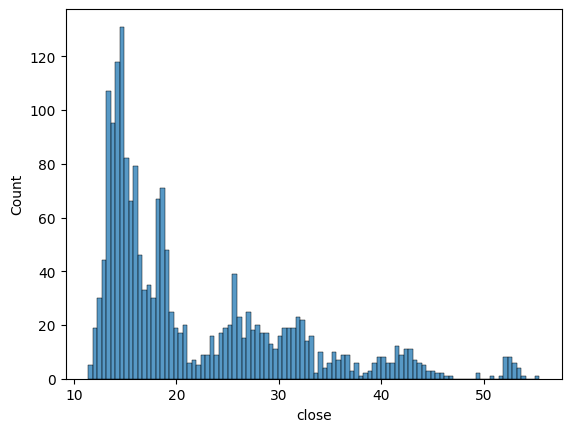

In [63]:
sns.histplot(df.close, bins= 100)

In [ ]:
#stats
df[['open','close','high','low']].describe()

,open,close,high,low
count,1861.000000,1861.000000,1861.000000,1861.000000
mean,21.650056,21.651482,22.133693,21.272929
std,9.280784,9.284769,9.983165,9.077203
min,11.380000,11.390000,11.620000,3.350000
25%,14.620000,14.620000,14.830000,14.380000
50%,18.080000,18.090000,18.330000,17.790000
75%,27.080000,27.070000,27.670000,26.730000
max,55.500000,55.390000,150.000000,52.870000


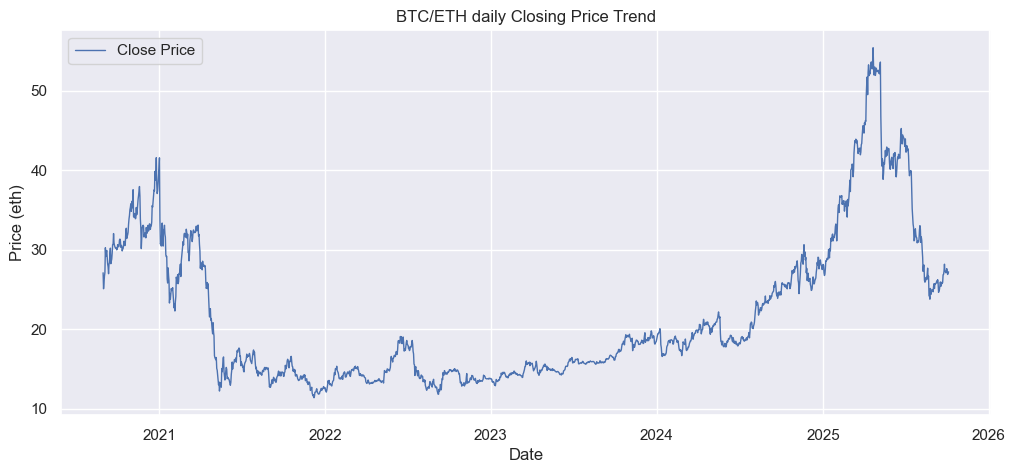

In [ ]:
# glance at close price over time
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['close'], label ='Close Price', linewidth = 1)
plt.title('BTC/ETH daily Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Price (eth)')
plt.legend()
plt.grid(True)

In [88]:
df['target'] = df['close'].shift(-1)
df

,unix,date,symbol,open,high,low,close,volume_wbtc,volume_eth,tradecount,target
0,1759536000000,2025-10-04,wbtceth,27.1600,27.3900,27.1600,27.2200,0.40975,11.164314,169,27.0500
1,1759449600000,2025-10-03,wbtceth,26.8600,27.2700,26.4500,27.0500,1.59839,43.162561,502,26.8900
2,1759363200000,2025-10-02,wbtceth,27.2400,27.3200,26.7300,26.8900,0.59010,15.916575,386,27.2800
3,1759276800000,2025-10-01,wbtceth,27.6000,27.7300,26.9200,27.2800,0.90510,24.810029,223,27.6200
4,1759190400000,2025-09-30,wbtceth,27.1300,27.6500,27.0500,27.6200,0.80532,22.023941,293,27.1400
...,...,...,...,...,...,...,...,...,...,...,...
1856,1599177600000,2020-09-04,wbtceth,26.6279,27.6672,26.3214,27.1388,11.43740,305.619449,544,26.6862
1857,1599091200000,2020-09-03,wbtceth,26.0149,27.4065,25.4458,26.6862,21.85060,578.793301,1069,25.9359
1858,1599004800000,2020-09-02,wbtceth,24.8566,26.8284,24.8243,25.9359,28.12000,719.895339,814,25.0915
1859,1598918400000,2020-09-01,wbtceth,26.9386,27.4292,24.6384,25.0915,13.44950,348.936288,650,27.0967


In [ ]:
df = df.dropna()

In [64]:
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# Apply shuffled index before splitting
df_shuffled = df.iloc[idx].reset_index(drop=True)
df_shuffled

,unix,date,symbol,open,high,low,close,volume_wbtc,volume_eth,tradecount
0,1611014400000,2021-01-19,wbtceth,29.1307,29.2211,25.6938,26.312,153.81660,4143.989395,18318
1,1663545600000,2022-09-19,wbtceth,14.5500,14.6800,14.1000,14.210,40.05091,573.512804,3887
2,1759363200000,2025-10-02,wbtceth,27.2400,27.3200,26.7300,26.890,0.59010,15.916575,386
3,1717545600000,2024-06-05,wbtceth,18.5300,18.7900,18.3400,18.390,2.69456,50.137467,1132
4,1647043200000,2022-03-12,wbtceth,15.1400,15.1800,15.0400,15.110,10.67293,161.291374,492
...,...,...,...,...,...,...,...,...,...,...
1856,1754697600000,2025-08-09,wbtceth,28.9600,28.9600,26.9900,27.280,3.09521,85.350743,865
1857,1716249600000,2024-05-21,wbtceth,19.4800,19.5400,18.3100,18.510,18.51695,348.674643,5038
1858,1704412800000,2024-01-05,wbtceth,19.4800,19.5900,19.2400,19.450,3.44491,67.071978,1159
1859,1729468800000,2024-10-21,wbtceth,25.1100,25.3100,25.0800,25.270,3.39579,85.464326,3412


In [65]:
# slit dataset
n_val = int(n * 0.2)                #20% of data for validation
n_test = int(n * 0.2)               #20% of data for testing.
n_train = n - n_val - n_test        #whatever is left for training (about 60%).

n_val, n_test, n_train

(372, 372, 1117)

In [66]:
df_train = df.iloc[: n_train ] #take rows from start (0) up to n_train. That’s the first 60% of the dataset.
df_val = df.iloc[n_train : n_train + n_val] #Starts at n_train (where training stopped).Goes up to n_train + n_val.That’s the next 20% of the dataset           
df_test = df.iloc[n_train + n_val : ] #Starts where validation stopped (n_train + n_val). Goes until the end of the DataFrame.That’s the last 20% of the dataset 
     

In [98]:
X = df [['open', 'high', 'close','low', 'volume_wbtc', 'volume_eth','tradecount']]
y = df['target']

In [ ]:
def train_linear_regression(X, y):
    pass

In [94]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full= XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [99]:
train_linear_regression(X, y)

(np.float64(-0.007680016734734736),
 array([ 9.98756704e-01, -3.98922971e-04, -4.89953436e-05,  2.13877317e-03,
        -3.83772764e-05,  4.97247943e-06, -3.62035582e-07]))